In [1]:
import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import os
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
%matplotlib inline
from google.colab import drive

In [6]:
drive.mount("/content/drive", force_remount=True)
train_path = "/content/drive/Shareddrives/PokémonAdami/PureDataset/PokémonTrain"
query_path = "/content/drive/Shareddrives/PokémonAdami/PureDataset/PokémonQueries"
descriptors_path = "/content/drive/Shareddrives/PokémonAdami/PureDataset/ResizedTrainDescriptors"

Mounted at /content/drive


In [7]:
class PokemonDescriptors():
  def __init__(self, pokemon_name, descriptors):
    self.pokemon_name = pokemon_name
    self.descriptors = descriptors
  def get_pokemon_name(self):
    return self.pokemon_name
  def get_pokemon_descriptors(self):
    return self.descriptors

In [8]:
class PokemonMatch():
  def __init__(self, pokemon_name, distance):
    self.pokemon_name = pokemon_name
    self.distance = distance
  def get_pokemon_name(self):
    return self.pokemon_name
  def get_pokemon_distance(self):
    return self.distance

In [9]:
pokemon_names = sorted(os.listdir(descriptors_path))
print(pokemon_names), len(pokemon_names)

['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmaleon', 'Charmander', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetch_d', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Likitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Nidoqueen', 'Nidorina'

(None, 149)

In [33]:
import random
pokemon_descriptors = []
pokemon_names = np.array(pokemon_names)
random.shuffle(pokemon_names)
for pokemon_name in pokemon_names[:3]:
  print(f"Loading {pokemon_name} descriptors")
  new_path = descriptors_path + "/" + pokemon_name
  descriptors_files = sorted(os.listdir(new_path))
  descriptors = []
  for descriptor_file in descriptors_files:
    csv_path = new_path + "/" + descriptor_file
    df = pd.read_csv(csv_path)
    descriptor = df.to_numpy(dtype=np.uint8)
    descriptors.append(descriptor)
  pokemon_descriptor = PokemonDescriptors(pokemon_name, np.array(descriptors))
  pokemon_descriptors.append(pokemon_descriptor)

Loading Marowak descriptors
Loading Vaporeon descriptors
Loading Drowzee descriptors


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [34]:
len(pokemon_descriptors)

3

In [35]:
pokemon_descriptors[0].get_pokemon_name()

'Marowak'

In [36]:
pokemon_descriptors[0].get_pokemon_descriptors()[0].shape

(454, 32)

In [37]:
pokemon_query_names = sorted(os.listdir(query_path)[:3])
print(pokemon_query_names)

['Ekans', 'Fearow', 'Spearow']


In [51]:
import random
query_name_choice = random.choice(pokemon_names[:3])
print(query_name_choice)

Marowak


In [52]:
single_query_path = query_path + "/" + query_name_choice
print(single_query_path)

/content/drive/Shareddrives/PokémonAdami/PureDataset/PokémonQueries/Marowak


In [53]:
query_images = os.listdir(single_query_path)
query_img_name = random.choice(query_images)
query_img_path = single_query_path + "/" + query_img_name
print(query_img_path)

/content/drive/Shareddrives/PokémonAdami/PureDataset/PokémonQueries/Marowak/Marowak5_query.jpg


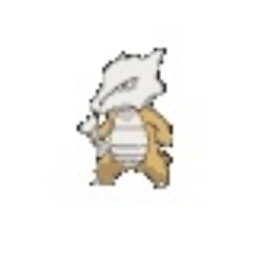

In [54]:
query_img = cv2.imread(query_img_path)
query_img = cv2.resize(query_img, (256, 256))
cv2_imshow(query_img)

In [55]:
orb = cv2.ORB_create()
kp2, query_desc = orb.detectAndCompute(query_img, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
pokemon_matches = []
for pokemon_descriptor in pokemon_descriptors:
  print(f"Comparing {pokemon_descriptor.get_pokemon_name()} with {query_name_choice}")
  descriptors = pokemon_descriptor.get_pokemon_descriptors()
  for descriptor in descriptors:
    matches = bf.match(descriptor, query_desc)
    matches = sorted(matches, key = lambda x:x.distance)
    distance = 0
    for match in matches[:1]:
      distance = match.distance
    pokemon_match = PokemonMatch(pokemon_descriptor.get_pokemon_name(), distance)
    pokemon_matches.append(pokemon_match)

Comparing Marowak with Marowak
Comparing Vaporeon with Marowak
Comparing Drowzee with Marowak


In [56]:
len(pokemon_matches)

33

In [57]:
pokemon_matches = sorted(pokemon_matches, key=lambda x: x.get_pokemon_distance())
pokemon_dict = {}
for pokemon_match in pokemon_matches:
  if pokemon_match.get_pokemon_distance() not in pokemon_dict:
    pokemon_dict[pokemon_match.get_pokemon_distance()] = []
  pokemon_dict[pokemon_match.get_pokemon_distance()].append(pokemon_match.get_pokemon_name())

In [58]:
for pokemon_match in pokemon_matches[:11]:
  # if pokemon_match.get_pokemon_name() == query_name_choice:
  print(f"{pokemon_match.get_pokemon_name()}: {pokemon_match.get_pokemon_distance()}")

Drowzee: 12.0
Vaporeon: 14.0
Marowak: 20.0
Marowak: 20.0
Marowak: 21.0
Marowak: 21.0
Vaporeon: 21.0
Marowak: 22.0
Vaporeon: 22.0
Drowzee: 22.0
Marowak: 23.0


In [ ]:
pokemon_dict

{27.0: ['101.Electrode', '106.Hitmonlee'],
 28.0: ['100.Voltorb'],
 30.0: ['104.Cubone'],
 32.0: ['10.Caterpie', '104.Cubone', '104.Cubone'],
 33.0: ['10.Caterpie', '102.Exeggcute'],
 34.0: ['102.Exeggcute', '104.Cubone', '104.Cubone', '105.Marowak'],
 35.0: ['10.Caterpie', '107.Hitmonchan'],
 36.0: ['10.Caterpie',
  '101.Electrode',
  '105.Marowak',
  '105.Marowak',
  '107.Hitmonchan'],
 37.0: ['1.Bulbasaur',
  '101.Electrode',
  '101.Electrode',
  '102.Exeggcute',
  '103.Exeggutor'],
 38.0: ['1.Bulbasaur',
  '1.Bulbasaur',
  '10.Caterpie',
  '100.Voltorb',
  '103.Exeggutor',
  '104.Cubone',
  '105.Marowak',
  '105.Marowak',
  '107.Hitmonchan'],
 39.0: ['10.Caterpie',
  '102.Exeggcute',
  '104.Cubone',
  '104.Cubone',
  '104.Cubone',
  '106.Hitmonlee',
  '107.Hitmonchan'],
 40.0: ['10.Caterpie',
  '103.Exeggutor',
  '103.Exeggutor',
  '103.Exeggutor',
  '103.Exeggutor',
  '104.Cubone',
  '105.Marowak',
  '105.Marowak',
  '105.Marowak',
  '105.Marowak',
  '107.Hitmonchan'],
 41.0: ['1.